# Cargamos Librerías

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import calmus as cs

# Cargamos archivo csv

In [34]:
df = pd.read_excel('GINEBRA_CLEAN.xlsx')
df = df.drop(columns=['FUENTE INFO', 'AMENIDADES'])
dfn = pd.read_excel('GINEBRA_NUMERICO.xlsx')
dfn = dfn.drop(columns=['FUENTE INFO', 'AMENIDADES'])
df.head()

,NOMBRE ANFITRION,FECHA INICIO ANFITRION,TIEMPO DE RESPUESTA,SUPERANFITRION,TIPO DE PROPIEDAD,TIPO DE CUARTO,TIENE DISPONIBILIDAD,RESERVA INSTANTANEA,ID ANUNCIIO,TASA DE RESPUESTA,...,PUNTAJE PRECISION,PUNTAJE LIMPIEZA,PUNTAJE CHECKIN,PUNTAJE COMUNICACION,PUNTAJE UBICACION,PUNTAJE VALOR,ANUNCIOS ANFITRION,ANUNCIOS HOGAR COMPLETO,ANUNCIOS HABITACION PRIVADA,REVIEWS POR MES
0,Noelle,2010-07-30,within a few hours,f,Private room in rental unit,Private room,t,f,42515,100.0,...,4.73,4.78,4.86,4.84,4.85,4.55,1.0,0,1.0,0.49
1,Mike,2011-08-21,within an hour,t,Entire rental unit,Entire home/apt,t,t,203997,100.0,...,4.98,4.89,4.97,4.99,4.96,4.81,2.0,2,0.0,0.60
2,Gaby,2011-11-25,within an hour,t,Entire rental unit,Entire home/apt,t,f,276025,100.0,...,4.70,4.74,4.88,4.89,4.77,4.68,1.0,1,0.0,0.78
3,Mike,2011-08-21,within an hour,t,Entire rental unit,Entire home/apt,t,t,338682,100.0,...,4.86,4.76,4.90,4.89,4.87,4.70,2.0,2,0.0,0.77
4,Oscar,2012-03-23,within an hour,t,Private room in rental unit,Private room,t,f,399388,100.0,...,4.81,4.88,4.95,4.89,4.70,4.70,2.0,0,2.0,0.38


# Realizamos las acciones de preprocesamiento necesarias: Nulos y Outliers

In [35]:
df = cs.sustituir_atipicos(df)

Nulos por columna: ID ANUNCIIO                    0
TASA DE RESPUESTA              0
TASA DE ACEPTACION             0
CANTIDAD ANUNCIOS              0
CANTIDAD TOTAL ANUNCIOS        0
LATITUD                        0
LONGITUD                       0
CAPACIDAD                      0
BAÑOS                          0
CAMAS                          0
PRECIO                         0
NOCHES MINIMAS                 0
NOCHES MAXIMAS                 0
MINIMO NOCHES MINIMAS          0
MAXIMO NOCHES MINIMAS          0
MINIMO NOCHES MAXIMAS          0
MAXIMO NOCHES MAXIMAS          0
PROMEDIO NOCHES MINIMAS        0
PROMEDIO NOCHES MAXIMAS        0
DISPONIBILIDAD 30D             0
DISPONIBILIDAD 60D             0
DISPONIBILIDAD 90D             0
DISPONIBILIDAD 365D            0
CANTIDAD REVIEWS               0
REVIEWS ULTIMOS 12M            0
PUNTAJE RATING                 0
PUNTAJE PRECISION              0
PUNTAJE LIMPIEZA               0
PUNTAJE CHECKIN                0
PUNTAJE COMUNICACION    

/Users/andrecalmus/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Tec/Universidad Tec/7° Semestre/Analítica de Datos y Herraminetas de Inteligencia Artificial/Prof. Alfredo/Parte 2/Actividades/Actividad 4.1/calmus.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualitativas = cualitativas_con_nulos.fillna(method='ffill')


# Función de Regresión Logística

In [36]:
def analisis_metricas(Vars_Indep, Var_Dep):
    #Redefinimos las variables
    X= Vars_Indep
    y= Var_Dep

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None)

    #Se escalan todos los datos
    escalar = StandardScaler()

    #Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    #Definimos el algoritmo a utilizar
    from sklearn.linear_model import LogisticRegression
    algoritmo = LogisticRegression()

    #Entrenamos el modelo
    algoritmo.fit(X_train, y_train)

    #Realizamos una predicción
    y_pred = algoritmo.predict(X_test)

    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred)
    True_Positive = matriz[0, 0]
    True_Negative = matriz[1, 1]
    False_Positive = matriz[0, 1]
    False_Negative = matriz[1, 0]

    #Graficar Matriz de Confusión
    plt.figure(figsize=(10, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.text(1, 1, f'True Negatives: {True_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(1, 0, f'False Positives: {False_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 1, f'False Negatives: {False_Negative}', ha='left', va='top', color='black', fontsize=14)
    plt.text(0, 0, f'True Positives: {True_Positive}', ha='left', va='top', color='black', fontsize=14)
    plt.show()

    #Defino el objetivo a calcular
    y_objetivo = np.unique(y)
    objetivo1 = y_objetivo[0]
    objetivo2 = y_objetivo[1]
    
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision1 = precision_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'Precisión del modelo {objetivo1}:') 
    print(round(precision1, 4))

    precision2 = precision_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'Precisión del modelo {objetivo2}:') 
    print(round(precision2, 4))

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score

    exactitud = accuracy_score(y_test, y_pred)
    print('Exactitud del modelo:')
    print(round(exactitud, 4))

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad1 = recall_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'Sensibilidad del modelo {objetivo1}:')
    print(round(sensibilidad1, 4))

    sensibilidad2 = recall_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'Sensibilidad del modelo {objetivo2}:')
    print(round(sensibilidad2, 4))

    #Calculo el F1 Score del modelo
    from sklearn.metrics import f1_score
    f1_1 = f1_score(y_test, y_pred, average='binary', pos_label=objetivo1)
    print(f'F1 Score del modelo {objetivo1}:')
    print(round(f1_1, 4))

    f1_2 = f1_score(y_test, y_pred, average='binary', pos_label=objetivo2)
    print(f'F1 Score del modelo {objetivo2}:')
    print(round(f1_2, 4))

## Modelo 1 Tiene Disponibilidad

<Axes: >

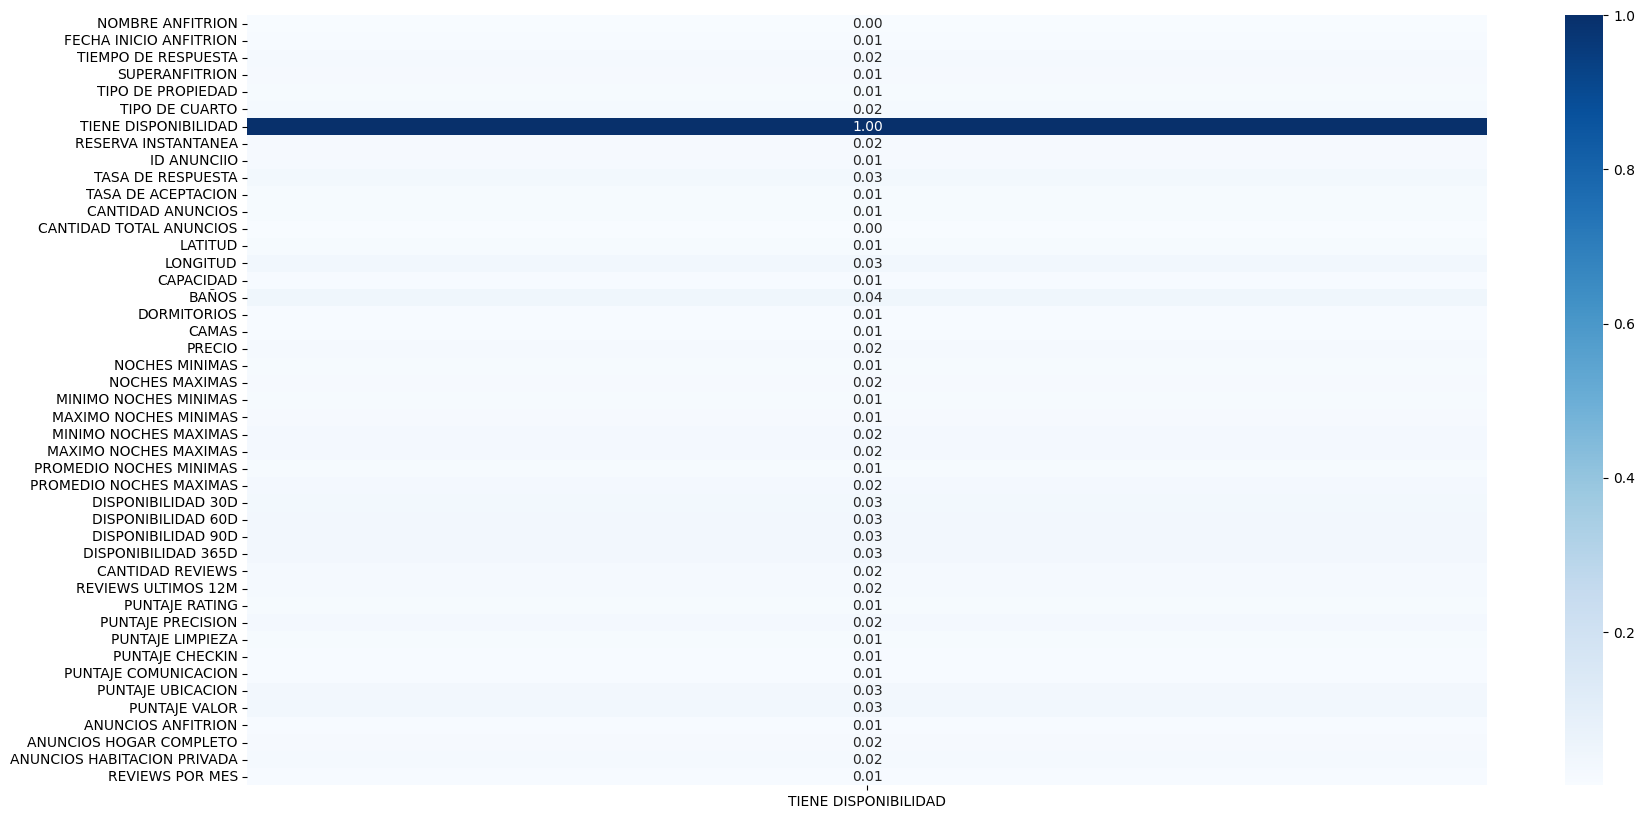

In [37]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['TIENE DISPONIBILIDAD']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

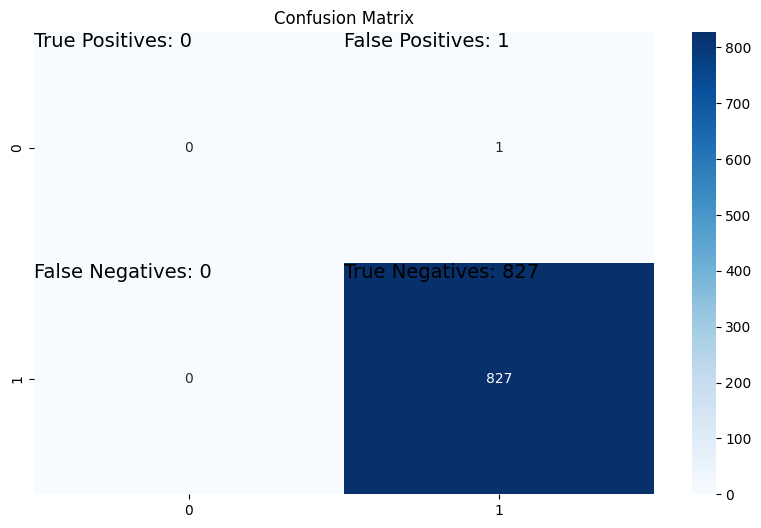

Precisión del modelo f:
0.0
Precisión del modelo t:
0.9988
Exactitud del modelo:
0.9988
Sensibilidad del modelo f:
0.0
Sensibilidad del modelo t:
1.0
F1 Score del modelo f:
0.0
F1 Score del modelo t:
0.9994


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['BAÑOS', 'TASA DE RESPUESTA', 'PUNTAJE UBICACION']]
Var_Dep = df['TIENE DISPONIBILIDAD']

tiene_disponibilidad = analisis_metricas(Vars_Indep, Var_Dep)
tiene_disponibilidad

## Modelo 2 Reserva Instantanea

<Axes: >

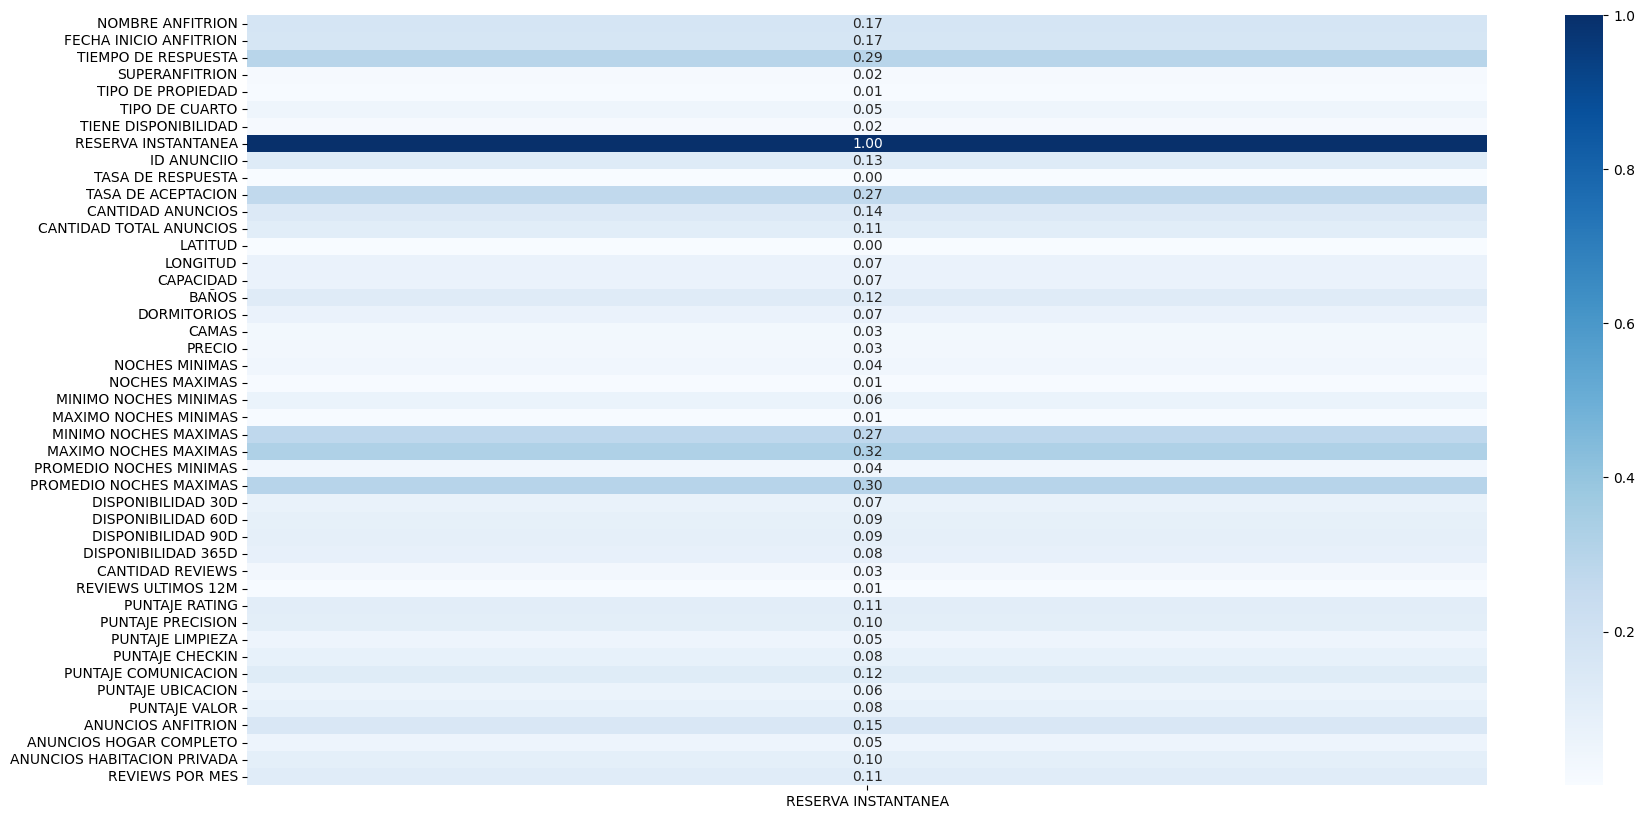

In [39]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['RESERVA INSTANTANEA']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

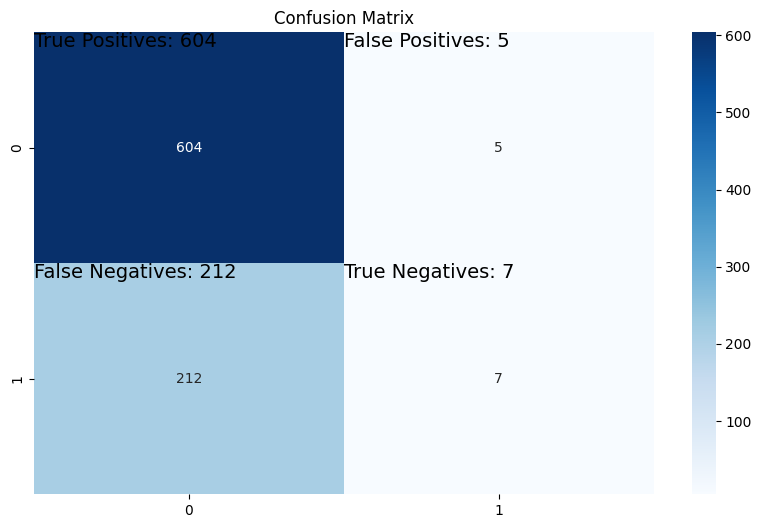

Precisión del modelo f:
0.7402
Precisión del modelo t:
0.5833
Exactitud del modelo:
0.7379
Sensibilidad del modelo f:
0.9918
Sensibilidad del modelo t:
0.032
F1 Score del modelo f:
0.8477
F1 Score del modelo t:
0.0606


In [40]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['MAXIMO NOCHES MAXIMAS', 'PROMEDIO NOCHES MAXIMAS', 'TIEMPO DE RESPUESTA']]
Var_Dep = df['RESERVA INSTANTANEA']

reserva_instantanea = analisis_metricas(Vars_Indep, Var_Dep)
reserva_instantanea

## Modelos 3 Tiempo de Respuesta

within an hour

<Axes: >

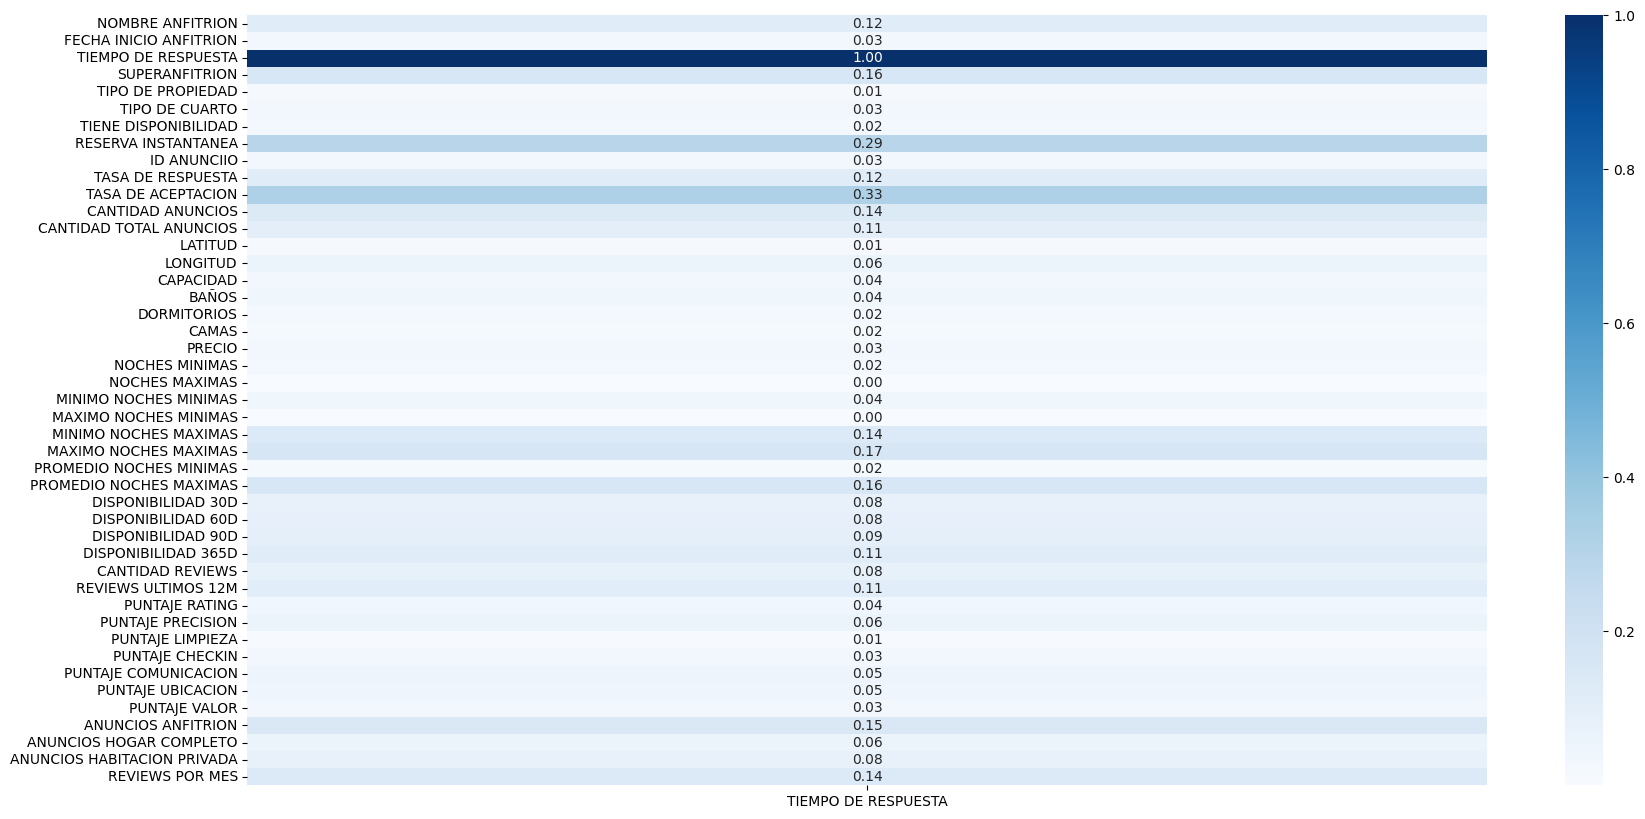

In [42]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['TIEMPO DE RESPUESTA']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

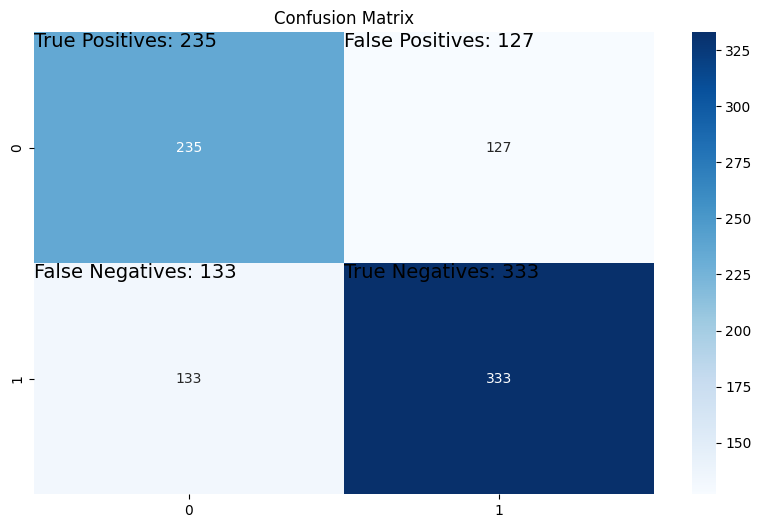

Precisión del modelo more than an hour:
0.6386
Precisión del modelo within an hour:
0.7239
Exactitud del modelo:
0.686
Sensibilidad del modelo more than an hour:
0.6492
Sensibilidad del modelo within an hour:
0.7146
F1 Score del modelo more than an hour:
0.6438
F1 Score del modelo within an hour:
0.7192


In [43]:
#Volvemos variables a dicotómicas
hour = df['TIEMPO DE RESPUESTA'].replace(['within a few hours', 'within a day', 'a few days or more'], 'more than an hour')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['TASA DE ACEPTACION', 'RESERVA INSTANTANEA', 'MAXIMO NOCHES MAXIMAS']]
Var_Dep = hour

modelo_hour = analisis_metricas(Vars_Indep, Var_Dep)
modelo_hour

## Modelo 4 Tipo de Propiedad

Enitre rental unit

<Axes: >

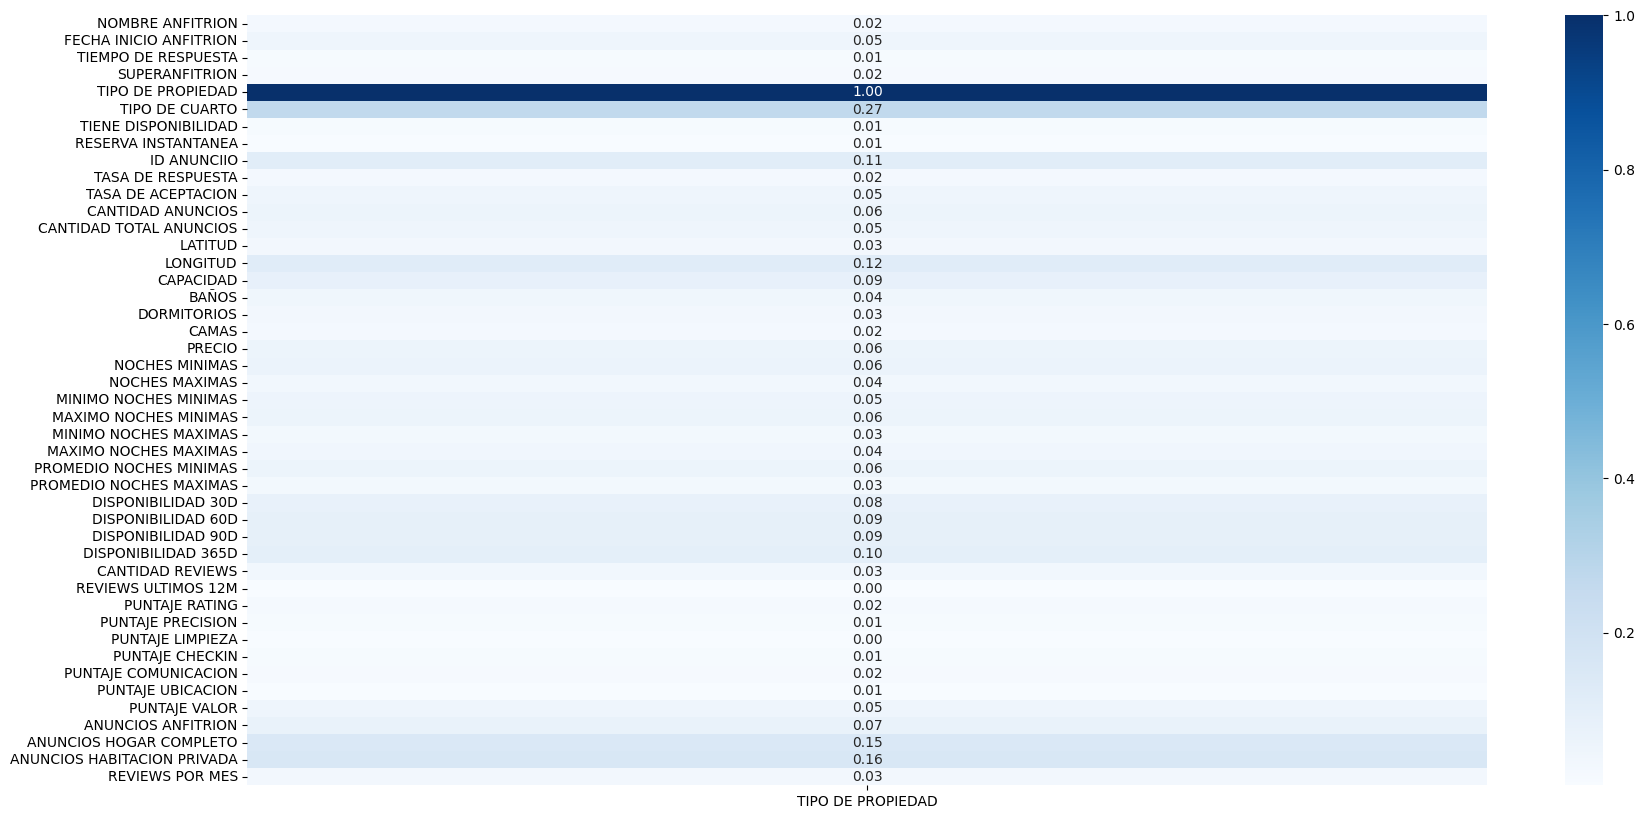

In [45]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['TIPO DE PROPIEDAD']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

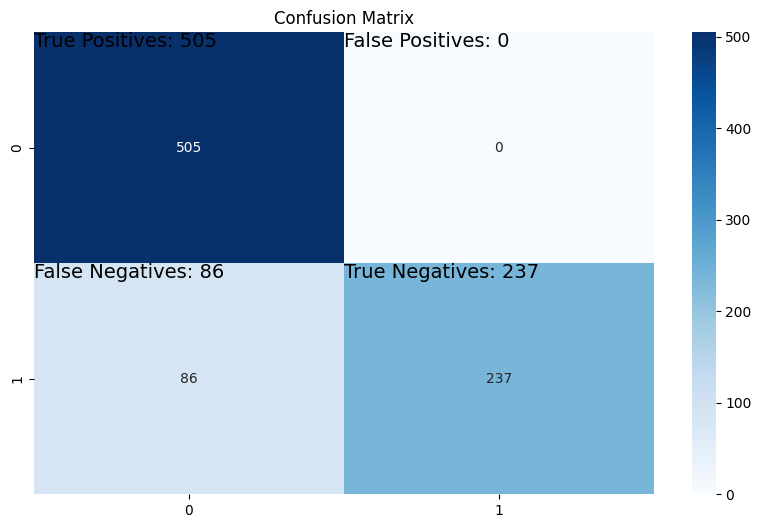

Precisión del modelo Entire rental unit:
0.8545
Precisión del modelo Not entire rental unit:
1.0
Exactitud del modelo:
0.8961
Sensibilidad del modelo Entire rental unit:
1.0
Sensibilidad del modelo Not entire rental unit:
0.7337
F1 Score del modelo Entire rental unit:
0.9215
F1 Score del modelo Not entire rental unit:
0.8464


In [49]:
#Volvemos variables a dicotómicas
propiedad = df['TIPO DE PROPIEDAD'].replace(['Private room in rental unit', 'Entire condo', 'Room in hotel', 'Private room in home', 'Private room in bed and breakfast', 'Entire home', 'Private room in condo', 'Entire serviced apartment', 'Entire loft', 'Entire villa', 'Private room in townhouse', 'Room in boutique hotel', 'Room in aparthotel', 'Private room in casa particular', 'Private room in villa', 'Entire guest suite', 'Entire guesthouse', 'Entire townhouse', 'Private room in loft', 'Private room in serviced apartment', 'Farm stay', 'Entire vacation home', 'Private room in guest suite', 'Private room in guesthouse', 'Shared room in loft', 'Shared room in rental unit', 'Yurt', 'Private room in chalet', 'Houseboat', 'Tiny home', 'Casa particular', 'Camper/RV', 'Entire place', 'Entire cabin', 'Boat', 'Entire cottage'], 'Not entire rental unit')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['TIPO DE CUARTO', 'ANUNCIOS HABITACION PRIVADA', 'ANUNCIOS HOGAR COMPLETO']]
Var_Dep = propiedad

modelo_propiedad = analisis_metricas(Vars_Indep, Var_Dep)
modelo_propiedad

## Modelo 5 Tipo de Cuarto

Entire home/apt

<Axes: >

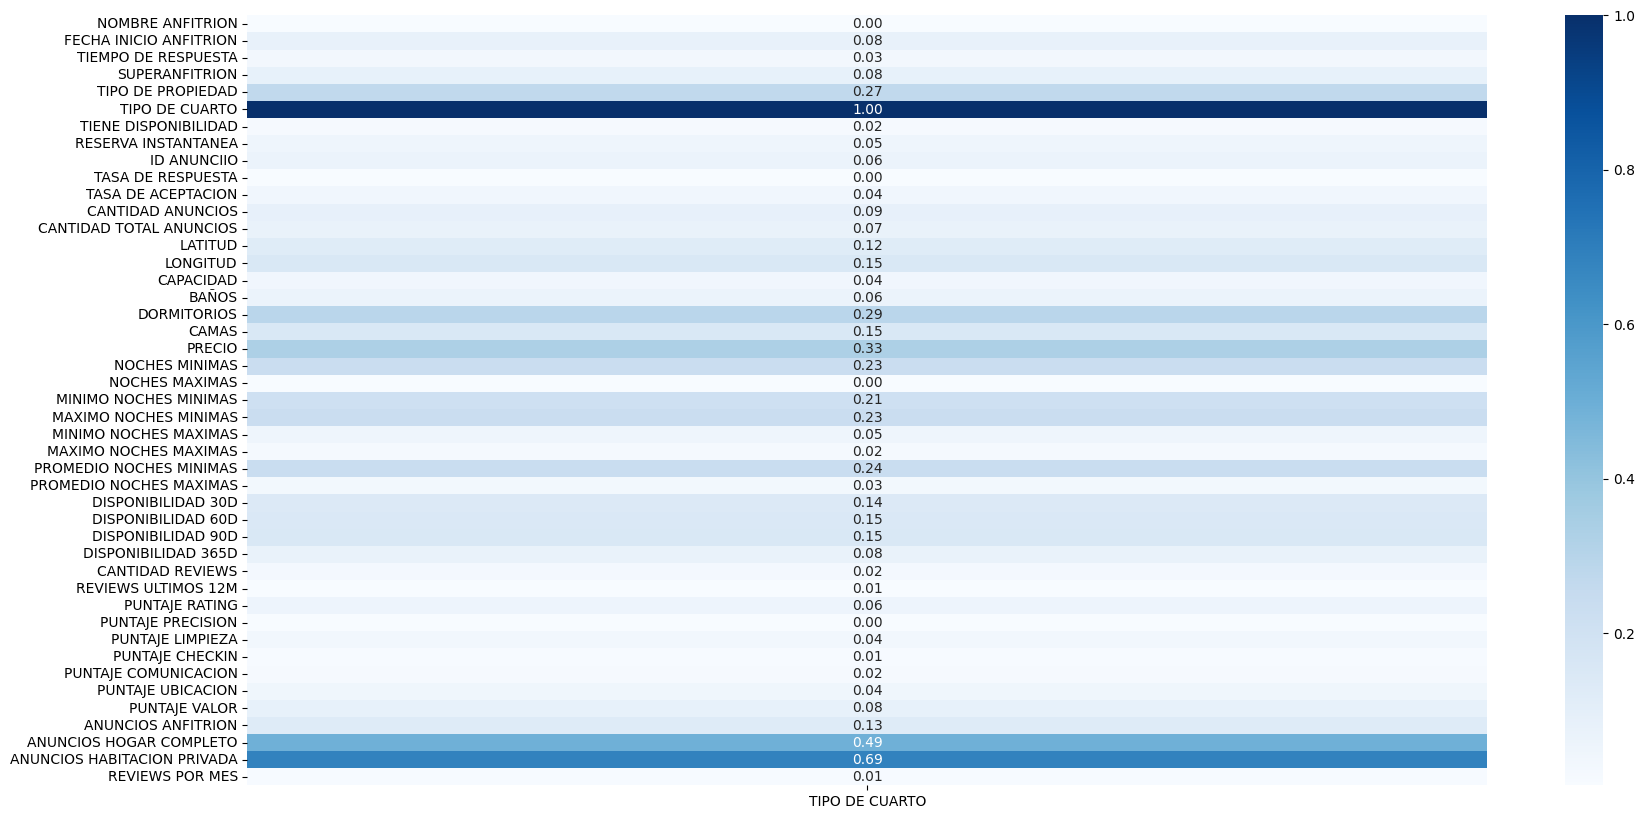

In [50]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['TIPO DE CUARTO']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

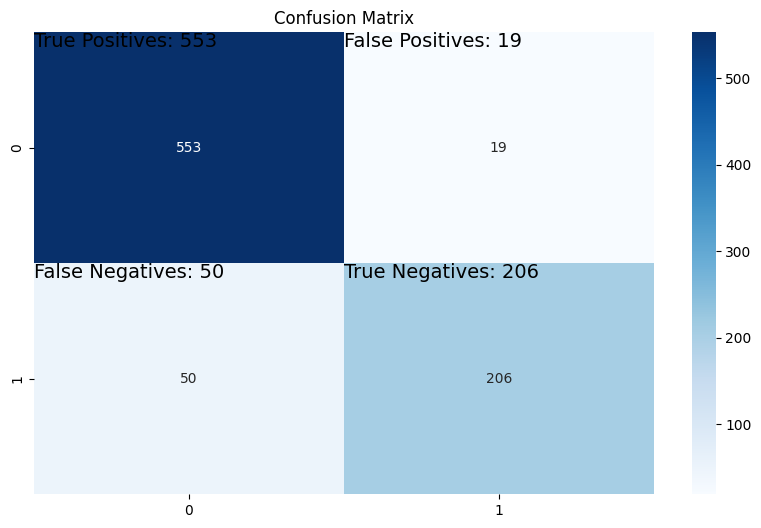

Precisión del modelo Entire home/apt:
0.9171
Precisión del modelo Not entire home/apt:
0.9156
Exactitud del modelo:
0.9167
Sensibilidad del modelo Entire home/apt:
0.9668
Sensibilidad del modelo Not entire home/apt:
0.8047
F1 Score del modelo Entire home/apt:
0.9413
F1 Score del modelo Not entire home/apt:
0.8565


In [52]:
#Volvemos variables a dicotómicas
cuarto = df['TIPO DE CUARTO'].replace(['Private room', 'Shared room', 'Hotel room'], 'Not entire home/apt')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['PRECIO', 'ANUNCIOS HABITACION PRIVADA', 'ANUNCIOS HOGAR COMPLETO']]
Var_Dep = cuarto

modelo_cuarto = analisis_metricas(Vars_Indep, Var_Dep)
modelo_cuarto

## Modelo 6 Capacidad

2

<Axes: >

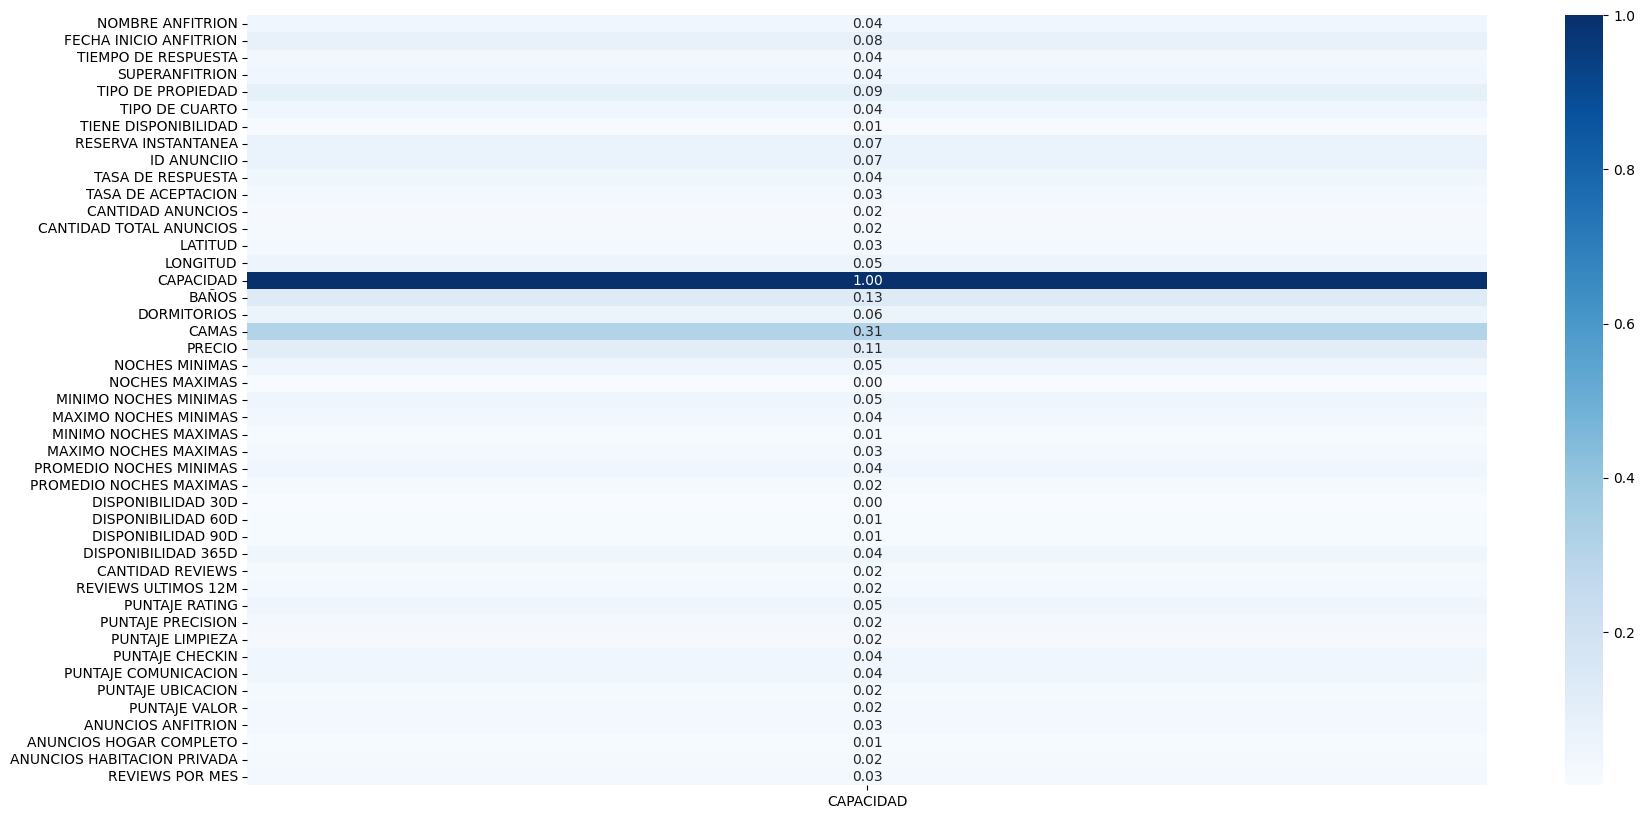

In [59]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['CAPACIDAD']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

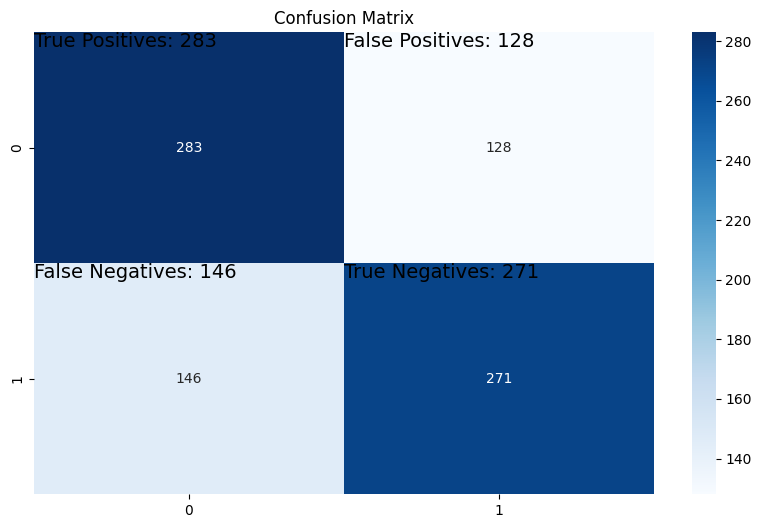

Precisión del modelo 2.0:
0.6597
Precisión del modelo Diferente a 2:
0.6792
Exactitud del modelo:
0.6691
Sensibilidad del modelo 2.0:
0.6886
Sensibilidad del modelo Diferente a 2:
0.6499
F1 Score del modelo 2.0:
0.6738
F1 Score del modelo Diferente a 2:
0.6642


In [60]:
#Volvemos variables a dicotómicas
df['CAPACIDAD'] = df['CAPACIDAD'].astype(str)
capacidad = df['CAPACIDAD'].replace(['1.0', '4.0', '3.0', '2.3', '2.5'], 'Diferente a 2')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['CAMAS', 'PRECIO', 'TIPO DE PROPIEDAD']]
Var_Dep = capacidad

modelo_capacidad = analisis_metricas(Vars_Indep, Var_Dep)
modelo_capacidad

## Modelo 7 Baños

1.0

<Axes: >

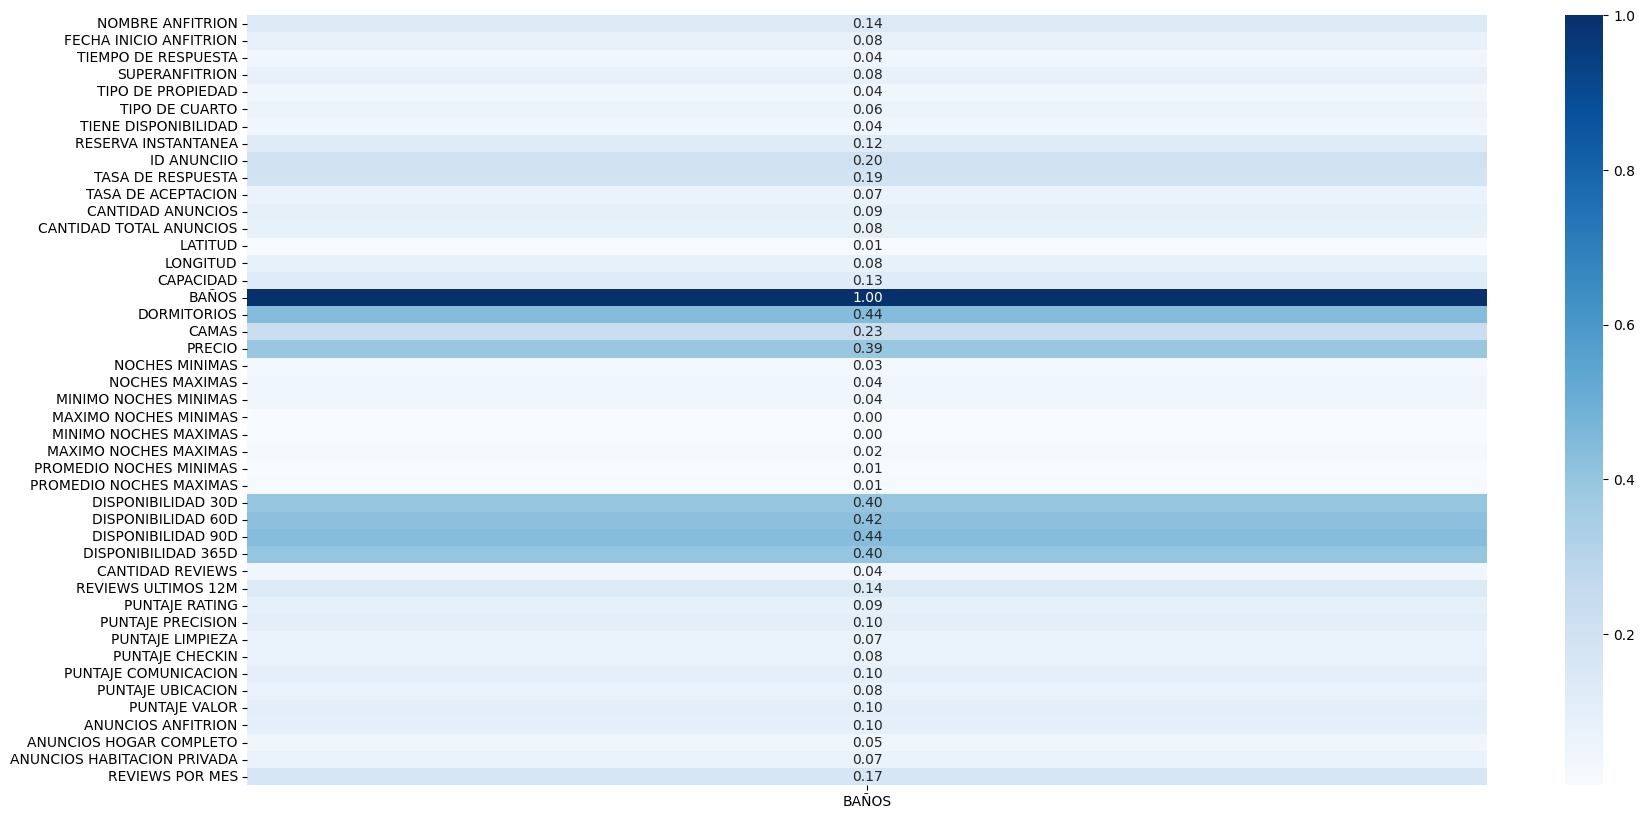

In [63]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['BAÑOS']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

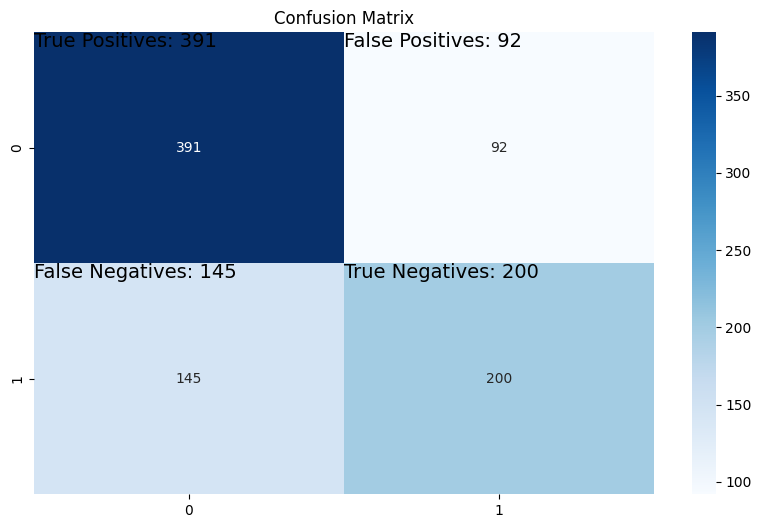

Precisión del modelo 1.0:
0.7295
Precisión del modelo Diferente a 1:
0.6849
Exactitud del modelo:
0.7138
Sensibilidad del modelo 1.0:
0.8095
Sensibilidad del modelo Diferente a 1:
0.5797
F1 Score del modelo 1.0:
0.7674
F1 Score del modelo Diferente a 1:
0.6279


In [67]:
#Volvemos variables a dicotómicas
df['BAÑOS'] = df['BAÑOS'].astype(str)
baños = df['BAÑOS'].replace(['1.2', '1.1'], 'Diferente a 1')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['DORMITORIOS', 'DISPONIBILIDAD 90D', 'DISPONIBILIDAD 60D']]
Var_Dep = baños

modelo_baños = analisis_metricas(Vars_Indep, Var_Dep)
modelo_baños

## Modelo 8 Camas

1.0

<Axes: >

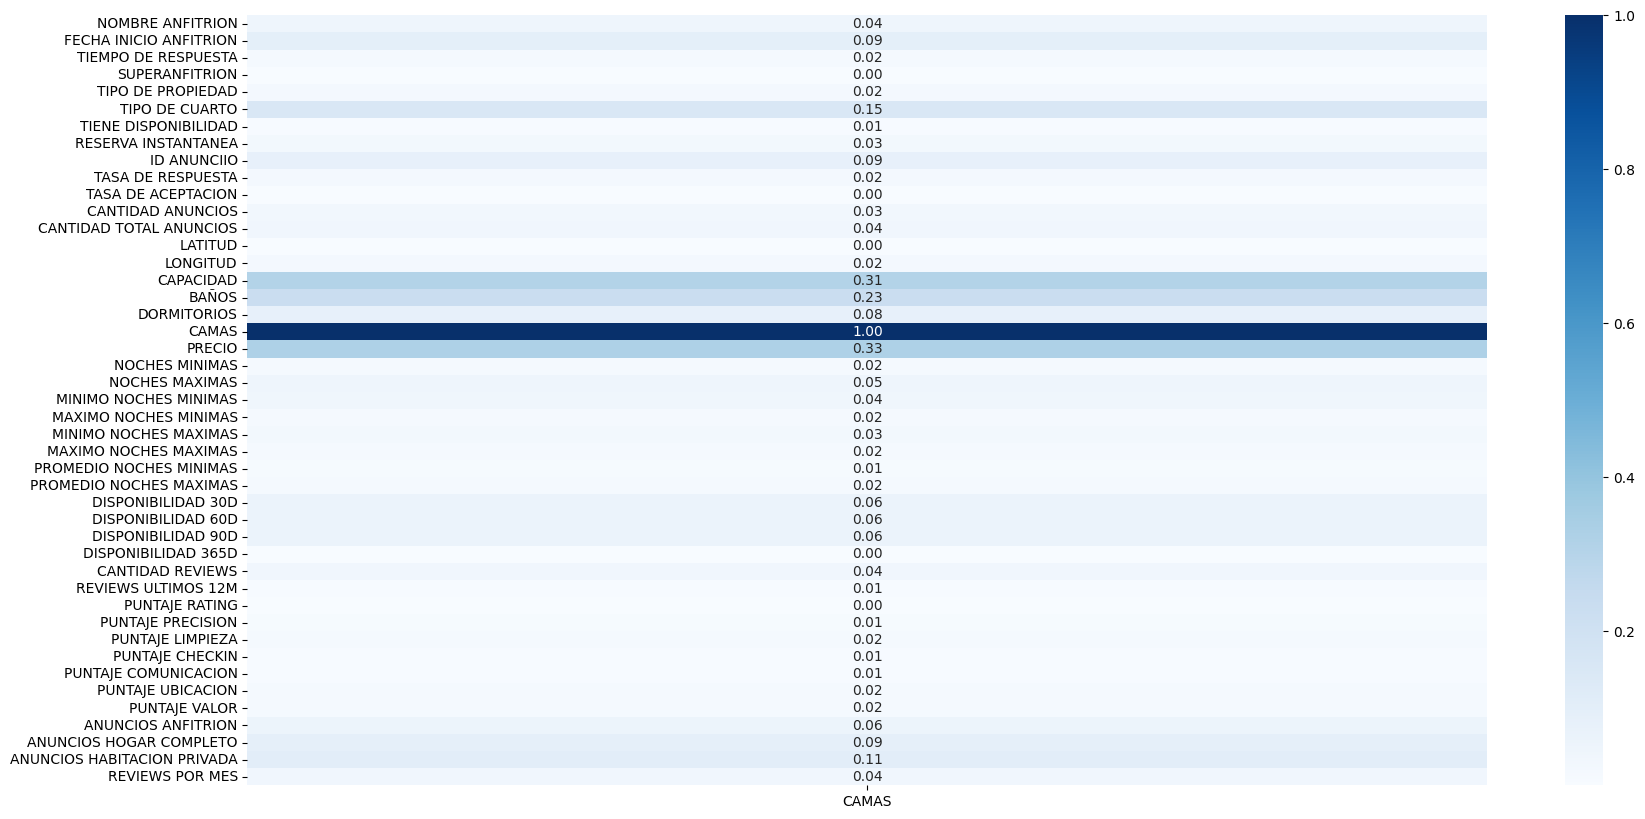

In [65]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['CAMAS']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

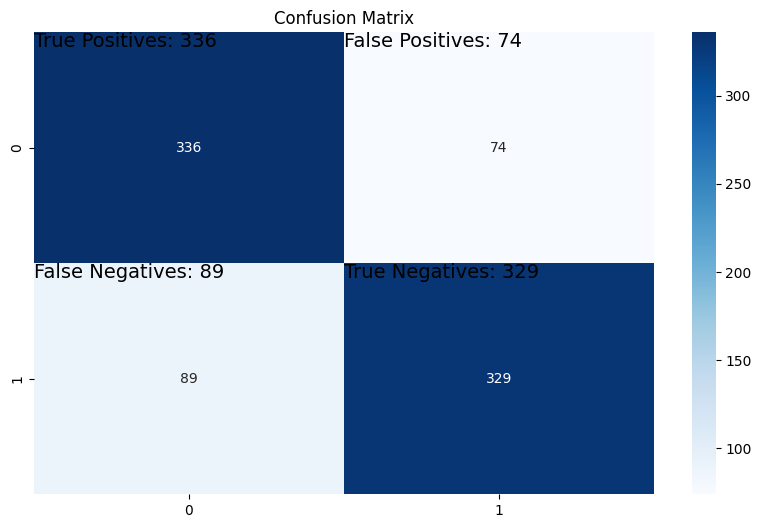

Precisión del modelo 1.0:
0.7906
Precisión del modelo Diferente a 1:
0.8164
Exactitud del modelo:
0.8031
Sensibilidad del modelo 1.0:
0.8195
Sensibilidad del modelo Diferente a 1:
0.7871
F1 Score del modelo 1.0:
0.8048
F1 Score del modelo Diferente a 1:
0.8015


In [68]:
#Volvemos variables a dicotómicas
df['CAMAS'] = df['CAMAS'].astype(str)
camas = df['CAMAS'].replace(['1.6', '2.0', '1.4'], 'Diferente a 1')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['PRECIO', 'CAPACIDAD', 'BAÑOS']]
Var_Dep = camas

modelo_camas = analisis_metricas(Vars_Indep, Var_Dep)
modelo_camas

## Modelo 9 Noches Minimas

1.0

<Axes: >

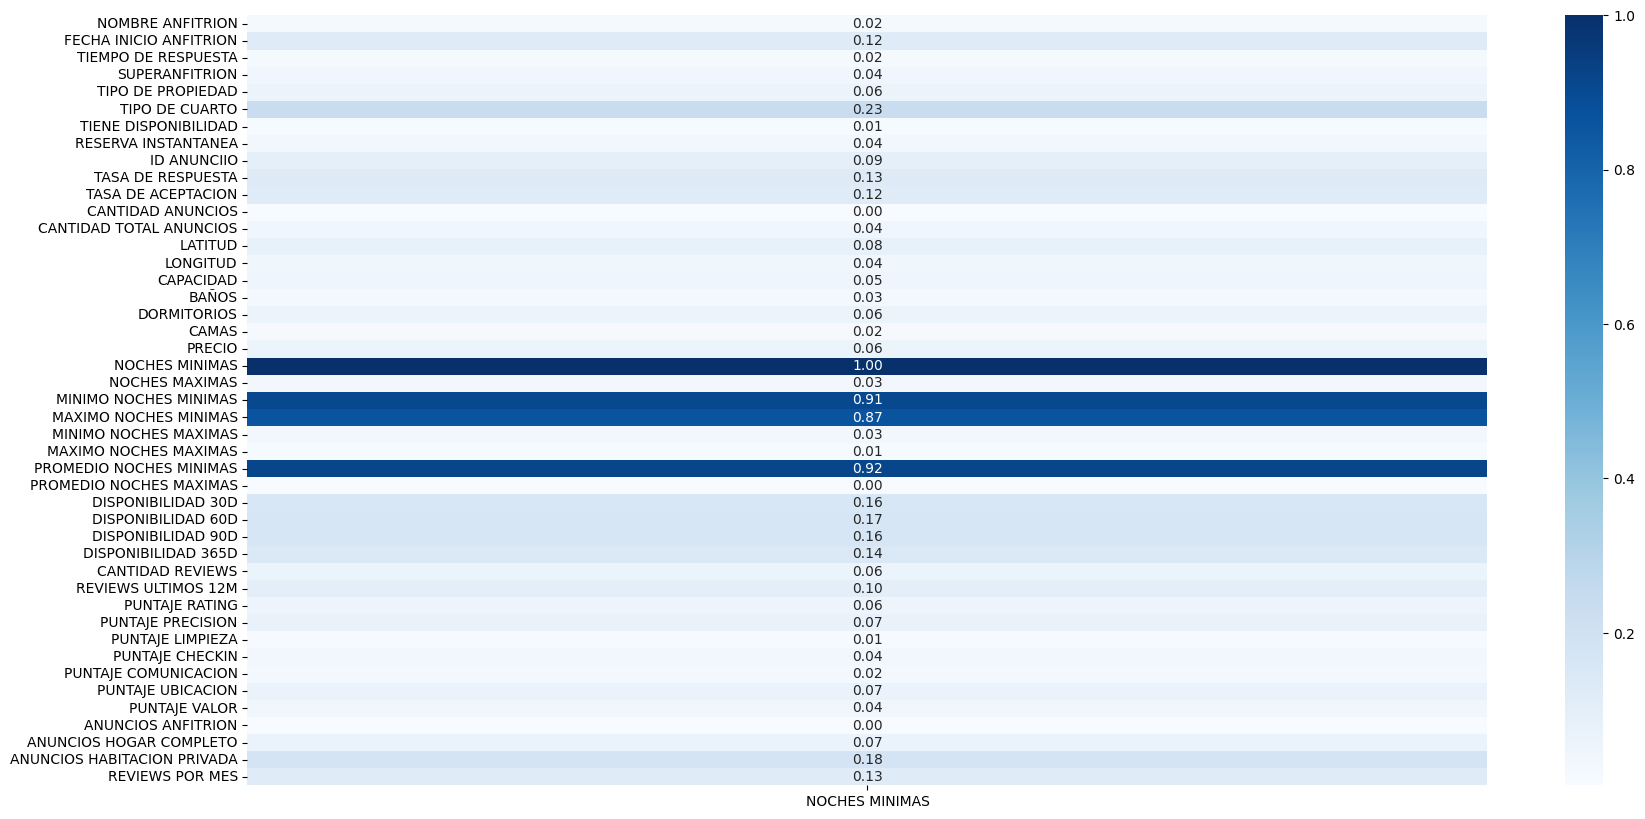

In [69]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['NOCHES MINIMAS']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

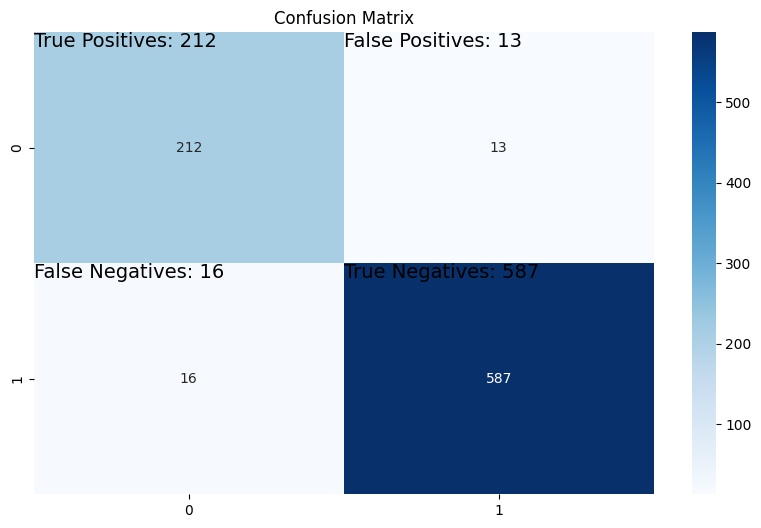

Precisión del modelo 1.0:
0.9298
Precisión del modelo Más de una noche:
0.9783
Exactitud del modelo:
0.965
Sensibilidad del modelo 1.0:
0.9422
Sensibilidad del modelo Más de una noche:
0.9735
F1 Score del modelo 1.0:
0.936
F1 Score del modelo Más de una noche:
0.9759


In [73]:
#Volvemos variables a dicotómicas
df['NOCHES MINIMAS'] = df['NOCHES MINIMAS'].astype(str)
minimas = df['NOCHES MINIMAS'].replace(['3.0', '2.7', '4.0', '2.4', '5.0', '2.0'], 'Más de una noche')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['PROMEDIO NOCHES MINIMAS', 'MINIMO NOCHES MINIMAS', 'MAXIMO NOCHES MINIMAS']]
Var_Dep = minimas

modelo_minimas = analisis_metricas(Vars_Indep, Var_Dep)
modelo_minimas

## Modelo 10 Anuncios

1.0

<Axes: >

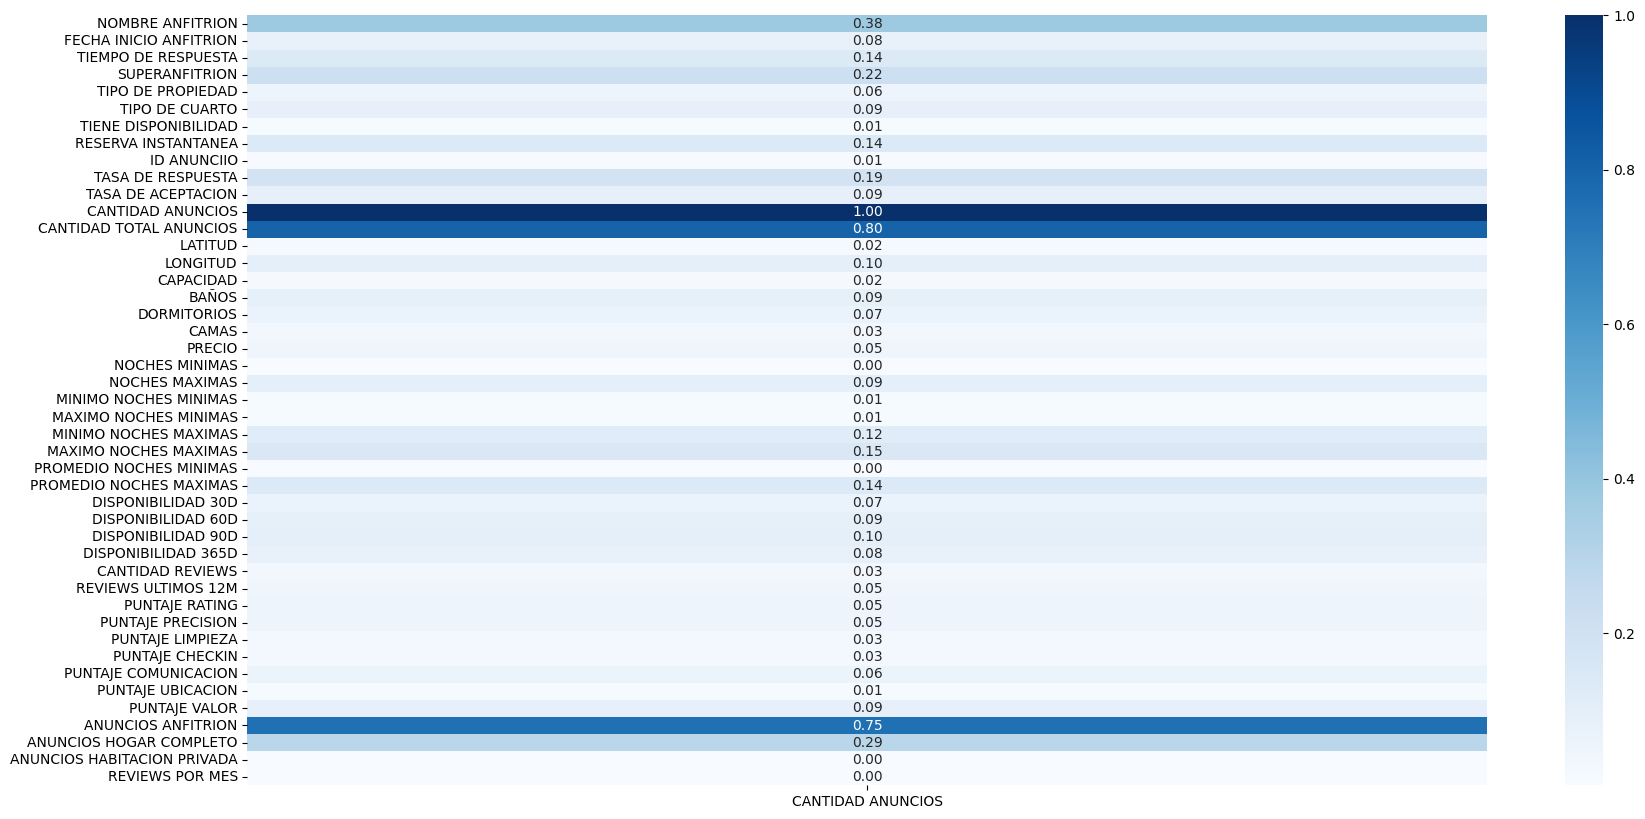

In [79]:
#Heatmap de correlación variable objetivo
corr_Factors = dfn.corr()[['CANTIDAD ANUNCIOS']]
corr_Factors = abs(corr_Factors)
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Blues', annot=True, fmt='.2f')
Heat_Map

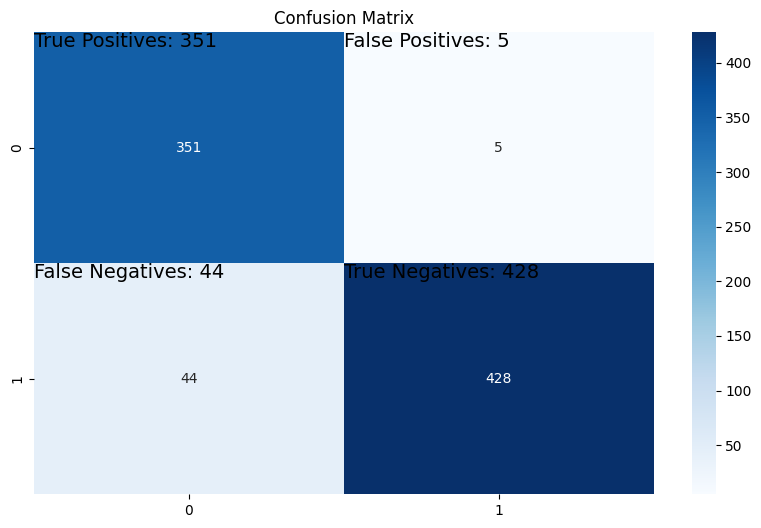

Precisión del modelo 1.0:
0.8886
Precisión del modelo Más de 1:
0.9885
Exactitud del modelo:
0.9408
Sensibilidad del modelo 1.0:
0.986
Sensibilidad del modelo Más de 1:
0.9068
F1 Score del modelo 1.0:
0.9348
F1 Score del modelo Más de 1:
0.9459


In [80]:
#Volvemos variables a dicotómicas
df['CANTIDAD ANUNCIOS'] = df['CANTIDAD ANUNCIOS'].astype(str)
anuncios = df['CANTIDAD ANUNCIOS'].replace(['2.2', '2.0', '1.6', '3.0'], 'Más de 1')

#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = dfn[['CANTIDAD TOTAL ANUNCIOS', 'ANUNCIOS ANFITRION', 'NOMBRE ANFITRION']]
Var_Dep = anuncios

modelo_anuncios = analisis_metricas(Vars_Indep, Var_Dep)
modelo_anuncios

# Tabla Comparativa

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Modificar la función analisis_metricas para devolver las métricas
def analisis_metricas(Vars_Indep, Var_Dep):
    # Redefinimos las variables
    X = Vars_Indep
    y = Var_Dep

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Escalamiento de las variables
    escalar = StandardScaler()
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)

    # Definimos el algoritmo a utilizar
    algoritmo = LogisticRegression()
    algoritmo.fit(X_train, y_train)

    # Realizamos una predicción
    y_pred = algoritmo.predict(X_test)

    # Calculamos las métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    exactitud = accuracy_score(y_test, y_pred)
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Devolvemos las métricas
    return {
        'Precisión': round(precision, 4),
        'Exactitud': round(exactitud, 4),
        'Sensibilidad': round(sensibilidad, 4),
        'F1 Score': round(f1, 4)
    }

# Crear una lista para almacenar los resultados de cada modelo
resultados = []

# Agregar los resultados de cada modelo
resultados.append({'Modelo': 'Tiene Disponibilidad', **analisis_metricas(dfn[['BAÑOS', 'TASA DE RESPUESTA', 'PUNTAJE UBICACION']], df['TIENE DISPONIBILIDAD'])})
resultados.append({'Modelo': 'Reserva Instantánea', **analisis_metricas(dfn[['MAXIMO NOCHES MAXIMAS', 'PROMEDIO NOCHES MAXIMAS', 'TIEMPO DE RESPUESTA']], df['RESERVA INSTANTANEA'])})
resultados.append({'Modelo': 'Tiempo de Respuesta', **analisis_metricas(dfn[['TASA DE ACEPTACION', 'RESERVA INSTANTANEA', 'MAXIMO NOCHES MAXIMAS']], hour)})
resultados.append({'Modelo': 'Tipo de Propiedad', **analisis_metricas(dfn[['TIPO DE CUARTO', 'ANUNCIOS HABITACION PRIVADA', 'ANUNCIOS HOGAR COMPLETO']], propiedad)})
resultados.append({'Modelo': 'Tipo de Cuarto', **analisis_metricas(dfn[['PRECIO', 'ANUNCIOS HABITACION PRIVADA', 'ANUNCIOS HOGAR COMPLETO']], cuarto)})
resultados.append({'Modelo': 'Capacidad', **analisis_metricas(dfn[['CAMAS', 'PRECIO', 'TIPO DE PROPIEDAD']], capacidad)})
resultados.append({'Modelo': 'Baños', **analisis_metricas(dfn[['DORMITORIOS', 'DISPONIBILIDAD 90D', 'DISPONIBILIDAD 60D']], baños)})
resultados.append({'Modelo': 'Camas', **analisis_metricas(dfn[['PRECIO', 'CAPACIDAD', 'BAÑOS']], camas)})
resultados.append({'Modelo': 'Noches Mínimas', **analisis_metricas(dfn[['PROMEDIO NOCHES MINIMAS', 'MINIMO NOCHES MINIMAS', 'MAXIMO NOCHES MINIMAS']], minimas)})
resultados.append({'Modelo': 'Anuncios', **analisis_metricas(dfn[['CANTIDAD TOTAL ANUNCIOS', 'ANUNCIOS ANFITRION', 'NOMBRE ANFITRION']], anuncios)})

# Crear un DataFrame con los resultados
tabla_comparativa = pd.DataFrame(resultados)

# Mostrar la tabla comparativa
print(tabla_comparativa)

                 Modelo  Precisión  Exactitud  Sensibilidad  F1 Score
0  Tiene Disponibilidad     0.9976     0.9988        0.9988    0.9982
1   Reserva Instantánea     0.7180     0.7319        0.7319    0.7237
2   Tiempo de Respuesta     0.6609     0.6618        0.6618    0.6613
3     Tipo de Propiedad     0.9093     0.8937        0.8937    0.8894
4        Tipo de Cuarto     0.9363     0.9360        0.9360    0.9347
5             Capacidad     0.7690     0.7681        0.7681    0.7684
6                 Baños     0.7093     0.7114        0.7114    0.7098
7                 Camas     0.8118     0.8092        0.8092    0.8096
8        Noches Mínimas     0.9758     0.9758        0.9758    0.9758
9              Anuncios     0.9284     0.9239        0.9239    0.9241


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
